# CmpE 548 - Monte Carlo Methods
## Assignment 1
### Question 1

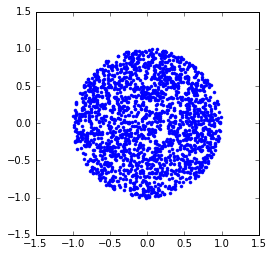

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

PI = np.pi
N = 1907 ## Number of points

## Generate r as specified

def getRadius():
    y = np.random.rand()
    r = np.sqrt(y)
    return r

## Generate theta
def getAngle():
    return 2*PI*np.random.rand()
    
## Fill two lists, X and Y, with x- and y-coordinates of generated points inside unit circle
def fillPoints(X, Y, N):
    for i in range(N):
        r = getRadius()
        theta = getAngle()
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        X.append(x)
        Y.append(y)
    return

## Get N points
X = []
Y = []
fillPoints(X, Y, N)

## Plot these points

plt.plot(X, Y, 'b.')
plt.axis('square');
plt.axis([-1.5, 1.5, -1.5, 1.5]);




The radius $R$ is generated from the distribution $f(r)$ that takes the value $2r$ when $0 \leq 2r \leq 1$, and vanishes otherwise. 

To use the inversion method to generate $R$ from this distribution, we notice that it has cdf $F(r) = r^2$, in the domain $0 \leq 2r \leq 1$.

The inverse is $F^{-1}(x) = \sqrt{x}$, so taking $u$ from $\mathcal{U} \sim (u, 0, 1)$ and then setting $r = F^{-1}(u)$ will yield the desired $r$.

Calculating $\theta \sim \mathcal{U} ~ (u, 0, 2\pi)$ is trivial.

### Question 2

Acceptance rate for p = 1.5: 0.8632


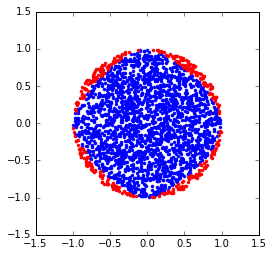

In [17]:
## Fill a p-norm ball by rejection sampling, using the unit circle as proposal
def fillNormBall(accX, accY, rejX, rejY, p, N):
    # Sample points from the circle
    for i in range(N):
        r = getRadius()
        theta = getAngle()
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        # Reject or accept
        if (np.power(np.abs(x), p) + np.power(np.abs(y), p) < 1):
            accX.append(x)
            accY.append(y)
        else:
            rejX.append(x)
            rejY.append(y)
    return

## Norm ball for p = 1.5
## Arrays holding the accepted and rejected points
accX = []
accY = []
rejX = []
rejY = []

fillNormBall(accX, accY, rejX, rejY, 1.5, N)
accRate = len(accX) / N
printStr = 'Acceptance rate for p = 1.5: ' + str(accRate)
print(printStr)

plt.plot(accX, accY, 'b.')
plt.plot(rejX, rejY, 'r.')
plt.axis('square');
plt.axis([-1.5, 1.5, -1.5, 1.5]);

Acceptance rate for p = 0.7: 0.3996


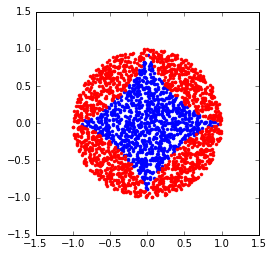

In [18]:
## Norm ball for p = 0.7
## Arrays holding the accepted and rejected points
accX = []
accY = []
rejX = []
rejY = []

fillNormBall(accX, accY, rejX, rejY, 0.7, N)
accRate = len(accX) / N
printStr = 'Acceptance rate for p = 0.7: ' + str(accRate)
print(printStr)

plt.plot(accX, accY, 'b.')
plt.plot(rejX, rejY, 'r.')
plt.axis('square');
plt.axis([-1.5, 1.5, -1.5, 1.5]);

The acceptance rate here is pretty low. The first idea that comes to mind for a better proposal is the square with corners on $(1, 0)$, $(0, 1)$, $(-1, 0)$, $(0, -1)$. This square has side length $\sqrt{2}$. 

To sample from this square, we can sample from another square with same side length, but with sides parallel to the axes, then rotate the points by 45 degrees.

Acceptance rate for p = 0.7 using tilted square as proposal: 0.6388


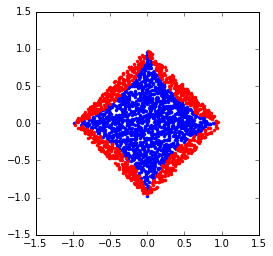

In [33]:
## Fill a p-norm ball by rejection sampling, using the tilted square as proposal
def fillNormBallUsingSquare(accX, accY, rejX, rejY, p, N):
    # Sample points from the square.
    for i in range(N):
        x = np.random.rand()*np.sqrt(2) - np.sqrt(2) / 2 ## generate uniformly in [-sqrt(2)/2, sqrt(2)/2]
        y = np.random.rand()*np.sqrt(2) - np.sqrt(2) / 2
        # Rotate by 45 degrees
        xNew = x*np.sqrt(2)/2 - y*np.sqrt(2) / 2
        yNew = x*np.sqrt(2)/2 + y*np.sqrt(2) / 2
        x = xNew
        y = yNew
        # Reject or accept
        if (np.power(np.abs(x), p) + np.power(np.abs(y), p) < 1):
            accX.append(x)
            accY.append(y)
        else:
            rejX.append(x)
            rejY.append(y)
    return


## Norm ball for p = 0.7
## Arrays holding the accepted and rejected points
accX = []
accY = []
rejX = []
rejY = []

fillNormBallUsingSquare(accX, accY, rejX, rejY, 0.7, N)
accRate = len(accX) / N
printStr = 'Acceptance rate for p = 0.7 using tilted square as proposal: ' + str(accRate)
print(printStr)

plt.plot(accX, accY, 'b.')
plt.plot(rejX, rejY, 'r.')
plt.axis('square');
plt.axis([-1.5, 1.5, -1.5, 1.5]);

This results in a better acceptance rate than using the unit circle as a proposal. However, the shape is frankly at odds with the result - from the shape alone, it looks like the acceptance rate should be much higher than about 64%, which leads me to believe that the method I used to sample from the tilted square (sample from a regular square, then rotate), is skewed towards points on the edge, but I cannot prove that.

### Bonus Question

In [34]:
## Generate a random direction in N-dimensional Euclidean space

def getDirection(N):
    X = []
    norm = 0
    # Generate N separate Gaussian variables
    for i in range(N):
        var = np.random.normal()
        X.append(var)
        norm = norm + var * var
    norm = np.sqrt(norm)
    # Normalize the resulting vector
    for i in range(N):
        X[i] = X[i] / norm
    return X



How do we now introduce a bias for $r$? In general, the "volume" of the shell corresponding to small neighbourhoods of $r$ should intuitively increase with the order of $r^{n-1}$ - also squaring (no pun intended) with the case $n$ = 2. So, the cdf we are interested in is of the form $kr^n$, and for it to hit 1 when $r = 1$, $k$ must be $1$.

Then, like in Question 1, we have:

$F^{-1}(x) = x^{1/n}$, and generating $x$ uniformly on $[0, 1]$ will yield the required results.

In [37]:
def getRadius(N):
    return np.power(np.random.rand(), 1/N)

All in all, the function below will generate a single point in N-dimensional Euclidean space.

In [39]:
# Returns a point in N-dimensional Euclidean space
def getHyperPoint(N):
    X = getDirection(N)
    R = getRadius(N)
    for i in range(N):
        X[i] = X[i] * R
    return X

What would happen if we used rejection sampling instead, using the hypercube as a proposal? Then, our acceptance rate would tank as the number of dimensions increased. The [volume of a hypersphere](https://en.wikipedia.org/wiki/Volume_of_an_n-ball) satisfies the below recursive relation:

$V_n(R) = \frac{2\pi R^2}{n} V_{n-2}(R)$

where $V_n(R)$ is the volume of an $n$-dimensional hypersphere with radius $R$.

The volume of the enclosing hypercube of side length 2, $C_n(2)$, is simply $2^n$, which (boringly enough) satisfies the recursion $C_n(2) = 4C_{n-2}(2)$.

Let $A_n$ denote the acceptance rate of the rejection sampling in N dimensions.

$A_n$ = $\frac{V_n(1)}{C_n(2)} = \frac{1}{2\pi} \frac{V_{n-2}(1)}{C_{n-2}(2)} = \frac{1}{2\pi} A_{n-2}$.

Therefore, the acceptance rate **decreases geometrically** with the order of about $\sqrt{2\pi}$ as we go higher in dimension. An exact calculation for the even and odd cases is below, but the above information should be more than enough to convince ourselves that rejection sampling is a horribly inefficient method in high dimensions.

We know $V_2(R) = 2\pi R^2$, and $V_3(R) = \frac{4}{3}\pi R^3$.

$A_2 = \frac{V_2(1)}{4} = \frac{\pi}{4}$, so

$A_n = \frac{\pi}{4 * (2\pi)^{\frac{n-2}{2}}}$, when $n$ is even.

$A_3 = \frac{V_3(1)}{8} = \frac{\frac{4}{3}\pi}{8} = \frac{\pi}{6}$, so

$A_n = \frac{\pi}{6 * (2\pi)^{\frac{n-3}{2}}}$, when $n$ is odd.